# Algorithm Performance Comparison
* rrBLUP
* Random forest
* Bayesian LASSO
* Graph Convolutional Neural Network

In [1]:
import os
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Growth Conditions and Descriptions
envs = ["YPACETATE", "YPD14", "YPD40", "YPD42", "YPD6AU", "YPDANISO10", 
"YPDANISO20", "YPDANISO50", "YPDBENOMYL200", "YPDBENOMYL500", "YPDCAFEIN40", 
"YPDCAFEIN50", "YPDCHX05", "YPDCHX1", "YPDCUSO410MM", "YPDDMSO", "YPDETOH", 
"YPDFLUCONAZOLE", "YPDFORMAMIDE4", "YPDFORMAMIDE5", "YPDHU", "YPDKCL2M", 
"YPDLICL250MM", "YPDMV", "YPDNACL15M", "YPDNACL1M", "YPDNYSTATIN", "YPDSDS", 
"YPDSODIUMMETAARSENITE", "YPETHANOL", "YPGALACTOSE", "YPRIBOSE", "YPGLYCEROL", 
"YPXYLOSE", "YPSORBITOL"]

# growth temperature is 30C if not specified
cond = {"YPDKCL2M":"YPD KCL 2M", "YPGALACTOSE":"YP Galactose 2%", "YPD40":"YPD 40C", 
"YPDCHX05":"YPD Cycloheximide 0.5µg/ml", "YPDLICL250MM":"YPD LiCl 250mM", 
"YPGLYCEROL":"YP Glycerol 2%", "YPD42":"YPD 42C", "YPDCHX1":"YPD Cycloheximide 1µg/ml", 
"YPDMV":"YPD Methylviologen 20mM", "YPRIBOSE":"YP Ribose 2%", "YPD6AU":"YPD 6-Azauracile 600µg/ml", 
"YPDCUSO410MM":"YPD CuSO4 10mM", "YPDNACL15M":"YPD NaCl 1.5M", "YPSORBITOL":"YP Sorbitol 2%", 
"YPDANISO10":"YPD Anisomycin 10µg/ml", "YPDNACL1M":"YPD NaCl 1M", "YPXYLOSE":"YP Xylose 2%", 
"YPDANISO20":"YPD Anisomycin 20µg/ml", "YPDETOH":"YPD Ethanol 15%", "YPDSDS":"YPD SDS 0.2%", 
"YPDSODIUMMETAARSENITE":"YPD Sodium metaarsenite 2.5mM", "YPDNYSTATIN":"YPD Nystatin 10µg/ml", 
"YPDFLUCONAZOLE":"YPD Fluconazole 20µg/ml", "YPACETATE":"YP Acetate 2%", "YPDCAFEIN40":"YPD Caffeine 40mM", 
"YPDHU":"YPD Hydroxyurea 30mg/ml", "YPETHANOL":"YP Ethanol 2%", "YPD14":"YPD 14C", 
"YPDCAFEIN50":"YPD Caffeine 50mM", "YPDDMSO":"YPD DMSO 6%", "YPDANISO50":"YPD Anisomycin 50µg/ml", 
"YPDBENOMYL200":"YPD Benomyl 200µg/ml", "YPDFORMAMIDE4":"YPD Formamide 4%", 
"YPDBENOMYL500":"YPD Benomyl 500µg/ml", "YPDFORMAMIDE5":"YPD Formamide 5%"}

# Directory containing results
os.chdir("/mnt/home/seguraab/Shiu_Lab/Project/Results")

# Read in data
BL_cv = pd.read_csv("/mnt/home/seguraab/Shiu_Lab/Project/Results/BL_average_cv_R2.csv")
BL_test = pd.read_csv("/mnt/home/seguraab/Shiu_Lab/Project/Results/BL_average_test_R2.csv")
RF = pd.read_csv("/mnt/home/seguraab/Shiu_Lab/Project/Results/RF_average_R2_.csv")
rrBLUP_cv = pd.read_csv("/mnt/home/seguraab/Shiu_Lab/Project/Results/rrBLUP_average_cv_R2.csv")
rrBLUP_test = pd.read_csv("/mnt/home/seguraab/Shiu_Lab/Project/Results/rrBLUP_average_test_R2.csv")

In [2]:
BL_cv.rename(columns={"Unnamed: 0": "ID"}, inplace=True)
#BL_cv.set_index("Unnamed: 0", inplace=True)
BL_cv.head()

,ID,0
0,YP Acetate 2%,0.130621
1,YPD 14C,0.172139
2,YPD 40C,0.353457
3,YPD 42C,0.336523
4,YPD 6-Azauracile 600µg/ml,0.227993


In [3]:
BL_test.rename(columns={"Unnamed: 0": "ID"}, inplace=True)
#BL_test.set_index("Unnamed: 0", inplace=True)
BL_test.head()

,ID,0
0,YP Acetate 2%,0.102685
1,YPD 14C,0.103626
2,YPD 40C,0.335609
3,YPD 42C,0.302577
4,YPD 6-Azauracile 600µg/ml,0.109475


In [4]:
RF_test = RF[["ID", "r2_test"]]
#RF_test.set_index("ID", inplace=True)
RF_cv = RF[["ID", "r2_val"]]
#RF_cv.set_index("ID", inplace=True)
RF.set_index("ID", inplace=True)
RF.head()

,Unnamed: 0,r2_test,r2_val,PCC_test,PCC_val
ID,,,,,
YP Ribose 2%,0,0.190937,0.031501,0.440448,0.254696
YPD 42C,1,0.303068,0.287860,0.554624,0.536936
YPD Ethanol 15%,2,0.167117,0.022188,0.425474,0.180401
YP Ethanol 2%,3,0.171190,0.102688,0.433268,0.321071
YPD Nystatin 10µg/ml,4,0.114899,-0.019704,0.435790,0.045756


In [5]:
rrBLUP_cv.rename(columns={"Unnamed: 0": "ID"}, inplace=True)
#rrBLUP_cv.set_index("ID", inplace=True)
rrBLUP_cv.head()

,ID,0
0,YP Acetate 2%,0.143158
1,YPD 14C,0.176506
2,YPD 40C,0.354692
3,YPD 42C,0.335585
4,YPD 6-Azauracile 600µg/ml,0.231337


In [6]:
rrBLUP_test.rename(columns={"Unnamed: 0": "ID"}, inplace=True)
#rrBLUP_test.set_index("Unnamed: 0", inplace=True)
rrBLUP_test.head()

,ID,0
0,YP Acetate 2%,0.100523
1,YPD 14C,0.108240
2,YPD 40C,0.324398
3,YPD 42C,0.296119
4,YPD 6-Azauracile 600µg/ml,0.116491


In [7]:
# Merge datasets to make heatmaps
dfs_test = [BL_test, RF_test, rrBLUP_test]
dfs_cv = [BL_cv, RF_cv, rrBLUP_cv]
merged_test = reduce(lambda left,right: pd.merge(left, right, on="ID", how='outer'), dfs_test)
merged_cv = reduce(lambda left,right: pd.merge(left, right, on="ID", how='outer'), dfs_cv)
merged_test.columns = ["ID", "BL", "RF", "rrBLUP"]
merged_cv.columns = ["ID", "BL", "RF", "rrBLUP"]
merged_test.set_index("ID", inplace=True)
merged_cv.set_index("ID", inplace=True)
merged_test.head()

,BL,RF,rrBLUP
ID,,,
YP Acetate 2%,0.102685,0.067141,0.100523
YPD 14C,0.103626,0.070581,0.108240
YPD 40C,0.335609,0.377276,0.324398
YPD 42C,0.302577,0.303068,0.296119
YPD 6-Azauracile 600µg/ml,0.109475,0.087187,0.116491


In [8]:
merged_test.describe()

,BL,RF,rrBLUP
count,35.000000,35.000000,35.000000
mean,0.244566,0.244842,0.246297
std,0.153577,0.162649,0.154404
min,0.027012,0.039197,0.030092
25%,0.134513,0.118069,0.136806
50%,0.199133,0.190937,0.192944
75%,0.302391,0.308319,0.295273
max,0.609117,0.610265,0.618870


In [10]:
merged_test.to_csv("Test_model_results.csv")
merged_cv.to_csv("CV_model_results.csv")

## Heatmaps comparing model performance R-sq

/tmp/ipykernel_128590/2804061017.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(rect=[0, 1, 0, 1])


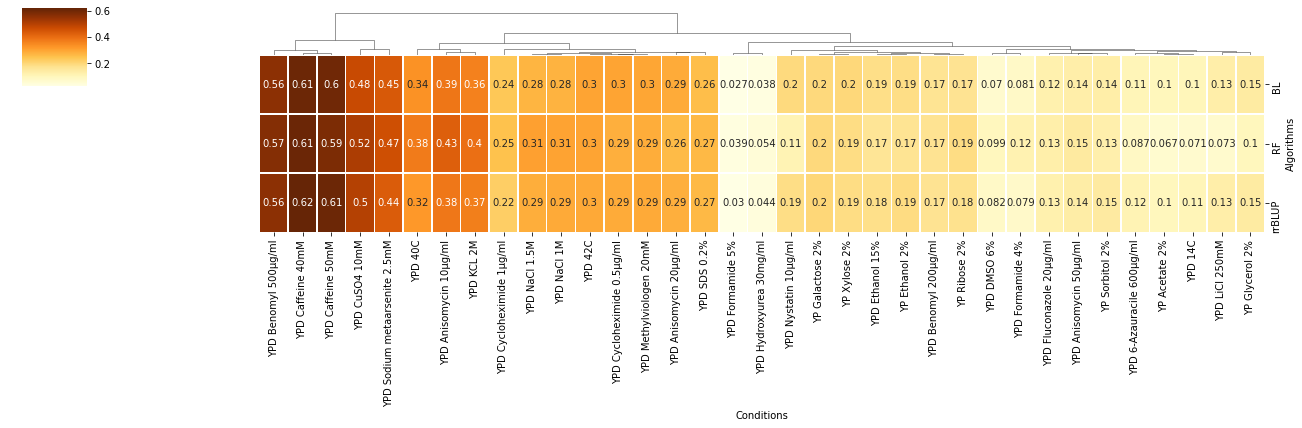

In [14]:
fig = sns.clustermap(merged_test.transpose(), cmap="YlOrBr", row_cluster=False, figsize=(18,6), linewidths=.5, annot=True)
ax = fig.ax_heatmap
ax.set_xlabel("Conditions")
ax.set_ylabel("Algorithms")
plt.tight_layout(rect=[0, 1, 0, 1])
plt.savefig("performance_comparison_R2.pdf")

/tmp/ipykernel_120168/3874306583.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(rect=[0, 1, 0, 1])


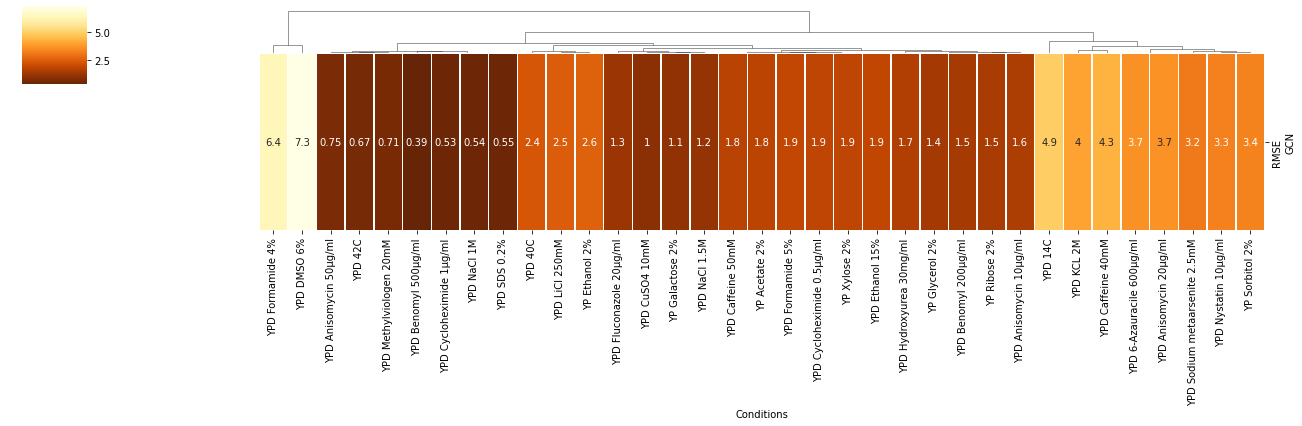

In [11]:
gcn = pd.read_csv("/mnt/home/seguraab/Shiu_Lab/Collabs/Multi_Omic/multi-omics/GCN/RESULTS_gcn.txt")
gcn['Trait'].replace(cond, inplace=True)
fig = sns.clustermap(gcn[['Trait', 'RMSE']].set_index('Trait').sort_values(by=['RMSE']).transpose(), cmap="YlOrBr_r", row_cluster=False, figsize=(18,6), linewidths=.5, annot=True)
ax = fig.ax_heatmap
ax.set_xlabel("Conditions")
ax.set_ylabel("GCN")
plt.tight_layout(rect=[0, 1, 0, 1])
plt.savefig("gcn_rmse_heatmap.pdf", bbox_inches="tight")

In [12]:
gcn.to_csv("gcn_results.csv")

In [16]:
blups = pd.read_csv("/mnt/scratch/seguraab/yeast_project/ORF_yeast_BLUPs_results/RESULTS_BLUPs.csv")
blups['Trait'].replace(cond, inplace=True)
blups.to_csv("blups_results.csv")
o = blups.loc[blups["Model"]=="OBLUP"].drop_duplicates()
c = blups.loc[blups["Model"]=="CBLUP"].drop_duplicates()
g = blups.loc[blups["Model"]=="GBLUP"].drop_duplicates()

lut = dict(zip(blups.Model.unique(), "rbg"))
row_colors = blups.Model.map(lut)
fig = sns.clustermap(blups[['Model', 'Trait', 'R-sq']].set_index(['Trait','Model']).transpose(), cmap="YlOrBr", row_cluster=False, figsize=(18,18), linewidths=.5, annot=True, row_colors=row_colors)
ax = fig.ax_heatmap
ax.set_xlabel("Conditions")
ax.set_ylabel("Algorithms")
plt.tight_layout(rect=[0, 1, 0, 1])
plt.savefig("/mnt/home/seguraab/Shiu_Lab/Project/Scripts/All_Algorithms/ORF_blups_heatmap.pdf")

fig, ax = plt.subplots(3, 1, figsize=(18,10), sharex=True)
sns.heatmap(o[['Trait', 'R-sq']].set_index('Trait').transpose(), cmap="YlOrBr", linewidths=.5, annot=True, ax=ax[0], xticklabels=False, center=0.5, annot_kws={'rotation': 90})
plt.ylabel("OBLUP")
sns.heatmap(c[['Trait', 'R-sq']].set_index('Trait').transpose(), cmap="YlOrBr", linewidths=.5, annot=True, ax=ax[1], xticklabels=False, center=0.5, annot_kws={'rotation': 90})
plt.ylabel("CBLUP")
sns.heatmap(g[['Trait', 'R-sq']].set_index('Trait').transpose(), cmap="YlOrBr", linewidths=.5, annot=True, ax=ax[2], center=0.5, annot_kws={'rotation': 90})
plt.xlabel("Conditions")
plt.ylabel("GBLUP")
#plt.tight_layout(rect=[0, 0, 0, 0])
plt.savefig("/mnt/home/seguraab/Shiu_Lab/Project/Scripts/All_Algorithms/ORF_blups_heatmap.pdf", bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/gs18/scratch/seguraab/yeast_project/ORF_yeast_BLUPs_results/RESULTS_BLUPs.csv'

In [ ]:

sommer = pd.read_csv('/mnt/home/seguraab/Shiu_Lab/Project/yeast_rrBLUP_results/SNPs_as_Features/Heritability_h2_H2_sommer.csv')
sommer['Conditions'].replace(cond, inplace=True)

peter = pd.read_csv('/mnt/home/seguraab/Shiu_Lab/Project/Data/Peter_2018/GW_heritability.tsv', sep='\t')
peter['Condition'].replace(cond, inplace=True)
peter['GW_heritability'] = peter['GW_heritability']/100

blups = pd.read_csv("/mnt/scratch/seguraab/yeast_project/ORF_yeast_BLUPs_results/RESULTS_BLUPs.csv")
blups['Trait'].replace(cond, inplace=True)
blups['1-heritability'] = 1 - blups['heritability']
o = blups.loc[blups["Model"]=="OBLUP"].drop_duplicates()
c = blups.loc[blups["Model"]=="CBLUP"].drop_duplicates()
g = blups.loc[blups["Model"]=="GBLUP"].drop_duplicates()

# Heritabilities
h2 = pd.concat([peter.set_index('Condition'), sommer[['Conditions', 'h2']].set_index('Conditions'), g[['Trait', '1-heritability']].set_index('Trait'), o[['Trait', '1-heritability']].set_index('Trait'), c[['Trait', '1-heritability']].set_index('Trait')], axis=1)
h2.columns = ["Peter", "Sommer", "GBLUP", "OBLUP", "CBLUP"]
h2 = h2.sort_values(by='Peter')

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.heatmap(ax = ax, data=h2, annot=True, cmap="rocket_r", yticklabels=h2.index)
plt.xticks(ticks=(0.5,1.5,2.5, 3.5, 4.5), labels=["Peter", "Sommer", "GBLUP", "OBLUP", "CBLUP"])
plt.savefig("/mnt/home/seguraab/Shiu_Lab/Project/Scripts/All_Algorithms/ORF_blups_h2_heatmap2.pdf", bbox_inches='tight')
